In [1]:
!pip install fplanck


ModuleNotFoundError: No module named 'fplanck'

In [2]:
#Used to show the animation
import fplanck
from matplotlib import rc
rc('animation', html='jshtml')

ModuleNotFoundError: No module named 'fplanck'

# Harmonic

A single particle in a titled periodic potential with periodic boundary conditions. The animation shows the time evolution of the probability distribution for the particle location. The PDF is driven in the positive direction due to the tilted potential.

In [ ]:
#Ignore the stationary plot in this cell & run the next one to see the animation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, uniform_pdf, harmonic_potential

nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius

U = harmonic_potential((0,0), 1e-6)
sim = fokker_planck(temperature=300, drag=drag, extent=600*nm,
            resolution=10*nm, boundary=boundary.reflecting, potential=U)

### steady-state solution
steady = sim.steady_state()

### time-evolved solution
pdf = uniform_pdf(lambda x: (x > 100*nm) & (x < 150*nm))
p0 = pdf(sim.grid[0])
Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 3e-3, Nsteps=Nsteps)

### animation
fig, ax = plt.subplots()

ax.plot(sim.grid[0]/nm, steady, color='k', ls='--', alpha=.5)
ax.plot(sim.grid[0]/nm, p0, color='red', ls='--', alpha=.3)
line, = ax.plot(sim.grid[0]/nm, p0, lw=2, color='C3')

def update(i):
    line.set_ydata(Pt[i])
    return [line]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x (nm)', ylabel='normalized PDF')
ax.margins(x=0)

plt.show()



In [4]:
anim

# Brownian

In [5]:
#Need this line or you'll get an import error
!pip install -U numpy 

Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.1)


Running dynamics: 100%|██████████| 4000/4000 [00:02<00:00, 1646.95it/s]


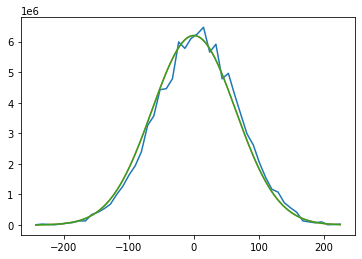

In [10]:
import numpy as np
import stoked
import matplotlib.pyplot as plt
from functools import partial
from scipy import constants

nm = 1e-9
temperature = 300
dt = 1e-6
Nparticles = 10000
initial = np.zeros([Nparticles,1], dtype=float)
drag = stoked.drag_sphere(50e-9, 8e-4)
k = 1e-6
kT = constants.k*temperature

def harmonic_force(t, rvec, orientation, k=1):
    return -k*rvec

bd = stoked.brownian_dynamics(temperature=temperature, dt=dt, position=initial, drag=drag, 
        force=partial(harmonic_force, k=k))
pos = bd.run(4000).position.squeeze()



fig, ax = plt.subplots()
hist, edges = np.histogram(pos[-1], bins=50, density=True)
ax.plot(edges[1:]/nm, hist)

x = np.linspace(edges[1], edges[-1], 200)
steady = np.sqrt(k/(2*np.pi*kT))*np.exp(-k*x**2/(2*kT))
ax.plot(x/nm, steady)


D = kT/drag.drag_T
tau = 2*kT/(k*D)
tf = bd.time
S = 1 - np.exp(-4*tf/tau)
P = np.sqrt(k/(2*np.pi*kT*S))*np.exp(-k*x**2/(2*kT*S))
ax.plot(x/nm, P)

plt.show()

In [1]:
import fenics

ModuleNotFoundError: No module named 'fenics'